# Llama-3-7B Basic RAG Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
dummy_synth = pd.read_csv('./ollama-3-dummy-responses/ragas_synth.csv')
dummy_curated = pd.read_csv('./ollama-3-dummy-responses/ragas_curated.csv')
test_synth = pd.read_csv('./ollama-3-test-responses/ragas_synth.csv')
test_curated = pd.read_csv('./ollama-3-test-responses/ragas_curated.csv')

In [3]:
dummy_synth.describe()

,Unnamed: 0,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence
count,29.000000,29.000000,29.000000,25.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,14.000000,0.336815,0.497059,0.458162,0.436048,0.219436,0.620690,0.679269,0.031404,0.517241,0.827586,0.896552,0.896552
std,8.514693,0.370425,0.233881,0.245461,0.405356,0.150789,0.493804,0.420627,0.099614,0.508548,0.384426,0.309934,0.309934
min,0.000000,0.000000,0.000000,-0.024753,-0.099346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.434009,0.303209,-0.033331,0.090909,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,14.000000,0.250000,0.496006,0.480281,0.659498,0.272727,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,21.000000,0.600000,0.535104,0.596574,0.769335,0.272727,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,28.000000,1.000000,1.000000,1.000000,1.000000,0.636364,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000


In [4]:
test_synth.describe()

,Unnamed: 0,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence
count,29.000000,21.000000,23.000000,28.000000,29.000000,29.000000,29.000000,20.000000,29.000000,29.000000,22.000000,23.000000,23.000000
mean,14.000000,0.303968,0.443376,0.473278,0.402347,0.031532,0.455412,0.632857,0.014368,0.451964,0.772727,0.782609,0.739130
std,8.514693,0.311692,0.234651,0.256559,0.395234,0.024600,0.390691,0.461093,0.054867,0.367300,0.428932,0.421741,0.448978
min,0.000000,0.000000,0.000000,-0.025206,-0.123094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.408075,0.354854,-0.050175,0.014706,0.000000,0.037500,0.000000,0.000000,1.000000,1.000000,0.500000
50%,14.000000,0.266667,0.498855,0.432561,0.502015,0.017857,0.500000,1.000000,0.000000,0.583333,1.000000,1.000000,1.000000
75%,21.000000,0.500000,0.588848,0.592003,0.749998,0.050847,0.833333,1.000000,0.000000,0.700000,1.000000,1.000000,1.000000
max,28.000000,0.850000,0.869517,1.000000,1.000000,0.094828,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000


In [5]:
dummy_curated.describe()

,Unnamed: 0,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence
count,60.000000,59.000000,60.000000,55.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,60.000000
mean,29.500000,0.335876,0.591683,0.415959,0.729319,0.262121,0.916667,0.400217,0.031498,0.866667,0.915254,0.933333,0.966667
std,17.464249,0.334936,0.068120,0.110587,0.103881,0.107293,0.278718,0.303373,0.067405,0.342803,0.280894,0.251549,0.181020
min,0.000000,0.000000,0.419199,0.230787,0.424720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.750000,0.000000,0.543871,0.335309,0.668827,0.181818,1.000000,0.193478,0.000000,1.000000,1.000000,1.000000,1.000000
50%,29.500000,0.333333,0.586896,0.394719,0.752439,0.272727,1.000000,0.366667,0.000000,1.000000,1.000000,1.000000,1.000000
75%,44.250000,0.500000,0.640197,0.462946,0.798770,0.272727,1.000000,0.600000,0.011905,1.000000,1.000000,1.000000,1.000000
max,59.000000,1.000000,0.745200,0.953894,0.888476,0.545455,1.000000,1.000000,0.375000,1.000000,1.000000,1.000000,1.000000


In [6]:
test_curated.describe()

,Unnamed: 0,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence
count,60.000000,53.000000,55.000000,55.000000,60.000000,60.000000,60.000000,30.000000,60.000000,60.000000,55.000000,55.000000,55.000000
mean,29.500000,0.245650,0.544207,0.426810,0.701981,0.015713,0.577940,0.307460,0.010198,0.667569,0.909091,0.981818,0.981818
std,17.464249,0.333516,0.167732,0.134944,0.105308,0.012480,0.365274,0.262297,0.043714,0.339127,0.290129,0.134840,0.134840
min,0.000000,0.000000,0.000000,0.153669,0.426075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.750000,0.000000,0.522566,0.319198,0.637797,0.012658,0.237500,0.000000,0.000000,0.404167,1.000000,1.000000,1.000000
50%,29.500000,0.000000,0.577545,0.403790,0.706731,0.015625,0.700000,0.309524,0.000000,0.779861,1.000000,1.000000,1.000000
75%,44.250000,0.500000,0.626235,0.509780,0.790779,0.015625,0.925000,0.553571,0.000000,0.950000,1.000000,1.000000,1.000000
max,59.000000,1.000000,0.766871,0.803176,0.867822,0.062500,1.000000,0.800000,0.285714,1.000000,1.000000,1.000000,1.000000


In [7]:
test_curated['contexts'][0]

"['Glycans favoring cell motility (e.g., polysialic acid) will be favored for development but become detrimental when accidentally exploited by malignant cells. Glycans on reproductive tract secretions favoring survival of sperm (e.g., Glycodelin S) might be counter-selected in females who benefit from a different glycan form (Glycodelin A), which challenges male gametes as part of female quality control. Unique glycans evolved as reliable SAMPs can become a liability if exploited by pathogens through molecular mimicry. Given the rapid evolution of extrinsic pathogens and their frequent use of glycans as targets for host recognition, it seems likely that a significant portion of the overall diversity in vertebrate cell-surface glycan structure reflects such pathogen-mediated selection processes. Meanwhile, even one critical intrinsic role of a glycan could disallow its elimination as a mechanism to evade pathogens. Thus, glycan expression patterns may represent trade-offs between evadi

In [8]:
def extract_context_list(sample):
    """converts the contexts column into a list of strings"""
    sample = sample.replace('[', '')
    sample = sample.replace(']', '')
    sample = sample.split('\n')
    for i, t in enumerate(sample):
        sample[i] = t[1:-1]
        if sample[i][0] == "'":
            sample[i] = sample[i][1:]

    return sample

In [9]:
from nltk import word_tokenize

In [10]:
sample = test_curated['contexts'][0]
sample = extract_context_list(sample)
lengths = [len(word_tokenize(i)) for i in sample]
sum(lengths)

2095

In [11]:
context_sizes = []
for retrieved in test_curated['contexts']:
    extracted = extract_context_list(retrieved)
    for text in extracted:
        size = len(word_tokenize(text))
        context_sizes.append(size)

mean_context_size = sum(context_sizes) / len(context_sizes)
print(mean_context_size)

392.0833333333333


In [12]:
max(context_sizes)

778

In [13]:
min(context_sizes)

114

In [14]:
len(word_tokenize(test_synth['question'][13]))

30

In [15]:
test_curated.columns

Index(['Unnamed: 0', 'question', 'contexts', 'answer', 'ground_truth',
       'faithfulness', 'answer_relevancy', 'answer_correctness',
       'answer_similarity', 'context_relevancy', 'context_precision',
       'context_recall', 'context_entity_recall', 'context_utilization',
       'harmfulness', 'correctness', 'coherence'],
      dtype='object')

In [16]:
q = len(word_tokenize(test_curated['question'][0]))
a = len(word_tokenize(test_curated['answer'][0]))
needed_cont_wind = sum(lengths)+q+a
print(q, a, needed_cont_wind)

81 38 2214


In [17]:
test_df = pd.concat([test_curated, test_synth], ignore_index=True)
dummy_df = pd.concat([dummy_curated, dummy_synth], ignore_index=True)
dummy_df[58:62]

,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence
58,58,Complete the following paragraph: Synthetic or...,"[""Glycobiology is the study of the structure, ...",This addition of synthetic or naturally derive...,Such materials have found increasing use as re...,0.666667,0.610033,0.470883,0.790974,0.090909,1.0,0.500000,0.090909,1.0,1.0,1,1
59,59,Complete the following paragraph: A strong bas...,"[""Glycobiology is the study of the structure, ...",The foundation has been laid for a comprehensi...,Given all these major advances in basic and ap...,0.500000,0.614871,NaN,0.792057,0.272727,1.0,0.173913,0.000000,1.0,1.0,1,1
60,0,"Based on the context, a question that can be f...","[""Glycobiology is the study of the structure, ...","Glycan Structure, including monosaccharides an...",NaN,1.000000,0.428389,0.002446,0.009784,0.363636,0.0,0.500000,0.000000,1.0,1.0,1,1
61,1,Here is a potential question that can be fully...,"[""Glycobiology is the study of the structure, ...","The study of carbohydrates, such as monosaccha...",NaN,1.000000,0.450623,0.355487,-0.078534,0.272727,0.0,0.000000,0.000000,0.0,1.0,1,1


In [18]:
test_context_window_req = []
dummy_context_window_req = []

def window_lengths(df:pd.DataFrame, context_window_req:list):
    for i in range(len(df)):
        q = len(word_tokenize(df['question'][i]))
        a = len(word_tokenize(df['answer'][i]))
        sample = df['contexts'][i]
        sample = extract_context_list(sample)
        lengths = [len(word_tokenize(i)) for i in sample]
        needed_cont_wind = sum(lengths)+q+a
        context_window_req.append(needed_cont_wind)
    return context_window_req

window_lengths(test_df, test_context_window_req)
window_lengths(dummy_df, dummy_context_window_req)

[374,
 365,
 330,
 443,
 444,
 324,
 349,
 370,
 341,
 349,
 334,
 383,
 367,
 420,
 402,
 316,
 411,
 329,
 375,
 319,
 352,
 361,
 330,
 368,
 371,
 393,
 349,
 316,
 379,
 365,
 324,
 396,
 375,
 395,
 394,
 363,
 381,
 371,
 332,
 332,
 375,
 356,
 373,
 348,
 379,
 344,
 404,
 417,
 405,
 337,
 476,
 423,
 494,
 322,
 378,
 423,
 354,
 326,
 323,
 435,
 358,
 396,
 283,
 357,
 471,
 341,
 324,
 288,
 341,
 288,
 372,
 350,
 330,
 321,
 536,
 331,
 379,
 374,
 306,
 499,
 346,
 308,
 305,
 471,
 366,
 425,
 478,
 364,
 416]

<Axes: ylabel='Count'>

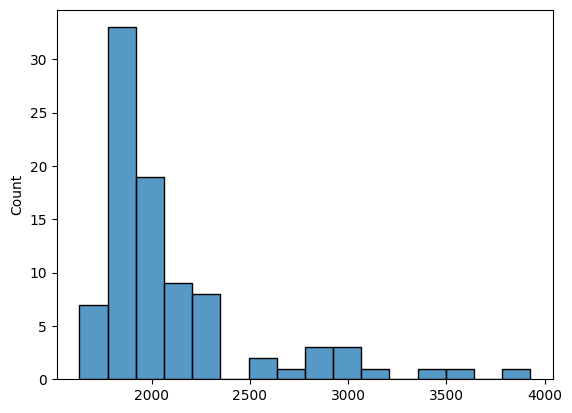

In [19]:
sns.histplot(test_context_window_req, cumulative=False)

<Axes: ylabel='Count'>

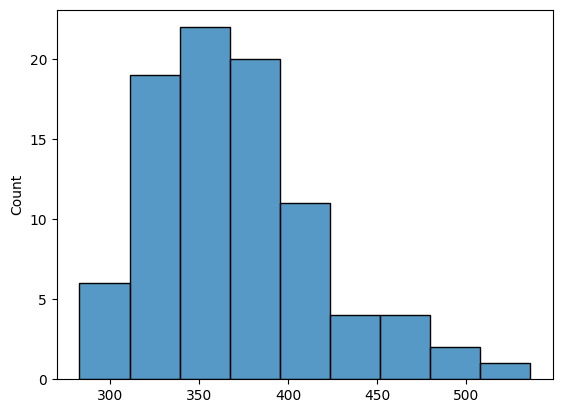

In [20]:
sns.histplot(dummy_context_window_req, cumulative=False)

In [21]:
# import sklearn utilities
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create the vectorizer
vectorizer = TfidfVectorizer(analyzer='word', max_df=0.5, stop_words='english')

# tf-idf matrices
answer_v_ground_truth = None
answer_v_retrieval = None
gt_v_contexts = None

# helper fx
def vectorize_answers(answers, target, vectorizer):
    """vectorizes the answers against given target"""
    matrix = pd.concat([answers, target], 
                       keys=['answers','targets'],
                       names=['group', 'index'],
                       ignore_index=False
                       )
    print(matrix.shape)
    matrix = vectorizer.fit_transform(matrix)
    print(matrix.shape)
    features = vectorizer.get_feature_names_out()
    print(features)
    return matrix, features

def ans_target_cosine_similarity(matrix, n):
    """computes the cosine similarity between the answers and the target"""
    pairwise = cosine_similarity(
        X = matrix[:n],
        Y = matrix[n:]
    )
    x_y = np.diagonal(pairwise)
    return x_y


# vectorize data
answer_v_ground_truth, gt_features = vectorize_answers(
    answers = test_curated['answer'],
    target=test_curated['ground_truth'],
    vectorizer=vectorizer
)
answer_v_retrieval, retrieval_features = vectorize_answers(
    answers = test_df['answer'],
    target=test_df['contexts'],
    vectorizer=vectorizer
)
gt_v_contexts, context_features = vectorize_answers(
    answers=test_curated['ground_truth'],
    target=test_curated['contexts'],
    vectorizer=vectorizer
)

# compute cosine similarity
test_curated['tf-idf-cos_GT'] = ans_target_cosine_similarity(answer_v_ground_truth, len(test_curated))
test_curated['tf-idf-cos_REC'] = ans_target_cosine_similarity(gt_v_contexts, len(test_curated))
test_df['tf-idf-cos_REL'] = ans_target_cosine_similarity(answer_v_retrieval, len(test_df))
test_curated.head()

(120,)
(120, 2616)
['000' '10' '100' ... 'α4glcnac' 'β1' 'β4galnac']
(178,)
(178, 3737)
['000' '025' '03' ... 'βcds' 'βgal' 'κb']
(120,)
(120, 3589)
['000' '10' '100' ... 'β1' 'β4galnac' 'κb']


,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence,tf-idf-cos_GT,tf-idf-cos_REC
0,0,Complete the following paragraph: A more compl...,"['Glycans favoring cell motility (e.g., polysi...",This paradigm shift would not only provide a m...,"However, unlike the situation with dark matter...",0.333333,0.701872,0.389649,0.808649,0.012987,1.000000,NaN,0.285714,0.887500,1.0,1.0,1.0,0.049764,0.017267
1,1,Complete the following paragraph: Monosacchari...,"['Glycans favoring cell motility (e.g., polysi...","through various linkages, such as α-1,2-, β-1,...","For example, glucuronic acid (GlcA) can be epi...",1.000000,0.000000,0.299166,0.563141,0.015625,0.366667,NaN,0.000000,0.250000,1.0,1.0,1.0,0.000000,0.005524
2,2,"Complete the following paragraph: In solution,...","['Glycans favoring cell motility (e.g., polysi...",This underscores their conformational flexibil...,Structural elements that dictate preferences f...,0.000000,0.651744,0.466098,0.661330,0.012658,0.700000,NaN,0.000000,0.833333,1.0,0.0,1.0,0.152870,0.024417
3,3,Complete the following paragraph: After more t...,"['Glycans favoring cell motility (e.g., polysi...",Here's a potential completion of the paragraph...,Possible reasons include their relative hydrop...,1.000000,0.697897,0.470624,0.823850,0.000000,1.000000,0.8,0.000000,1.000000,1.0,1.0,1.0,0.098881,0.009969
4,4,Complete the following paragraph: In eukaryoti...,"['Glycans favoring cell motility (e.g., polysi...",The machinery responsible for glycosylation in...,Glucose and fructose are the major carbon and ...,0.250000,0.715988,0.230126,0.522466,0.012658,0.000000,NaN,0.000000,1.000000,1.0,1.0,1.0,0.063961,0.014510


PearsonRResult(statistic=0.3572353385549153, pvalue=0.005078232701360341)


<Axes: xlabel='tf-idf-cos_GT', ylabel='answer_similarity'>

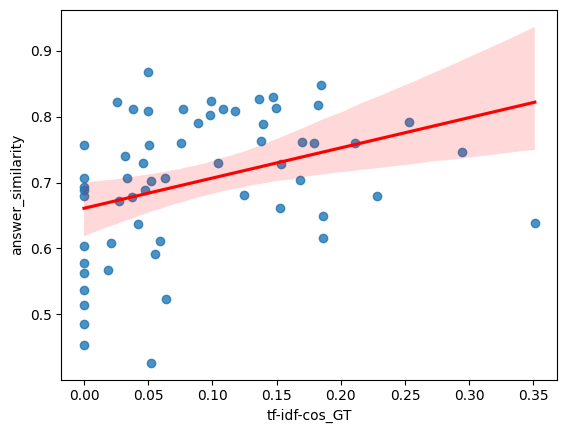

In [22]:
from scipy.stats import pearsonr
print(pearsonr(x=test_curated['tf-idf-cos_GT'], y=test_curated['answer_similarity']))
sns.regplot(data=test_curated, x='tf-idf-cos_GT', y='answer_similarity', line_kws={'color':'red'})

PearsonRResult(statistic=nan, pvalue=nan)


<Axes: xlabel='tf-idf-cos_REC', ylabel='context_recall'>

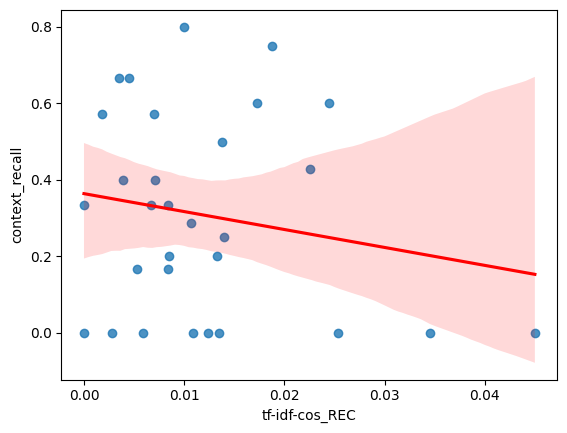

In [23]:
print(pearsonr(x=test_curated['tf-idf-cos_REC'], y=test_curated['context_recall']))
sns.regplot(data=test_curated, x='tf-idf-cos_REC', y='context_recall', line_kws={'color':'red'})

PearsonRResult(statistic=0.04529725771900933, pvalue=0.6733834964360385)


<Axes: xlabel='tf-idf-cos_REL', ylabel='context_relevancy'>

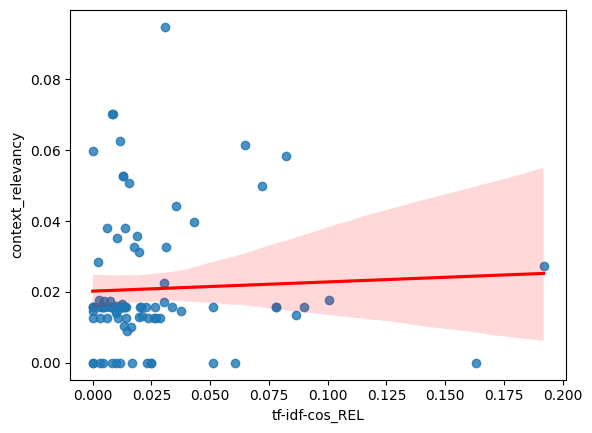

In [24]:
print(pearsonr(x=test_df['tf-idf-cos_REL'], y=test_df['context_relevancy']))
sns.regplot(data=test_df, x='tf-idf-cos_REL', y='context_relevancy', line_kws={'color':'red'})

In [25]:
# compute tf-idf for dummy tables
dummy_ans_v_gt, dummy_gt_features = vectorize_answers(
    answers=dummy_curated['answer'],
    target=dummy_curated['ground_truth'],
    vectorizer=vectorizer
)
# cosine sim
dummy_curated['tf-idf-ans'] = ans_target_cosine_similarity(
    matrix=dummy_ans_v_gt,
    n=len(dummy_curated)
)

dummy_curated.head()

(120,)
(120, 2608)
['000' '10' '1000' ... 'α4glcnac' 'β1' 'β4galnac']


,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,answer_correctness,answer_similarity,context_relevancy,context_precision,context_recall,context_entity_recall,context_utilization,harmfulness,correctness,coherence,tf-idf-ans
0,0,Complete the following paragraph: A more compl...,"[""Glycobiology is the study of the structure, ...",The inclusion of glycans in the molecular biol...,"However, unlike the situation with dark matter...",1.00,0.639503,0.461460,0.757090,0.272727,1.0,0.428571,0.375,1.0,1.0,1,1,0.117644
1,1,Complete the following paragraph: Monosacchari...,"[""Glycobiology is the study of the structure, ...",These nine common monosaccharide building bloc...,"For example, glucuronic acid (GlcA) can be epi...",0.00,0.707271,0.953894,0.813066,0.454545,1.0,0.230769,0.000,1.0,1.0,1,1,0.096675
2,2,"Complete the following paragraph: In solution,...","[""Glycobiology is the study of the structure, ...",The presence of IdoA2S and IdoA residues in so...,Structural elements that dictate preferences f...,0.00,0.588391,0.440589,0.669286,0.090909,1.0,0.200000,0.000,1.0,1.0,1,1,0.134627
3,3,Complete the following paragraph: After more t...,"[""Glycobiology is the study of the structure, ...",This ubiquitous presence of glycans can be att...,Possible reasons include their relative hydrop...,0.75,0.615176,0.453865,0.814597,0.454545,1.0,1.000000,0.000,1.0,1.0,0,1,0.081981
4,4,Complete the following paragraph: In eukaryoti...,"[""Glycobiology is the study of the structure, ...",The process of glycosylation in eukaryotic cel...,Glucose and fructose are the major carbon and ...,0.75,0.680478,0.552666,0.499742,0.272727,1.0,0.166667,0.100,1.0,1.0,1,1,0.047420


In [26]:
dummy_curated['tf-idf-ans'].describe()

count    60.000000
mean      0.107978
std       0.078490
min       0.000000
25%       0.046461
50%       0.092847
75%       0.135885
max       0.330514
Name: tf-idf-ans, dtype: float64

In [27]:
test_curated['tf-idf-cos_GT'].describe()

count    60.000000
mean      0.089476
std       0.081907
min       0.000000
25%       0.026887
50%       0.061220
75%       0.147633
max       0.351191
Name: tf-idf-cos_GT, dtype: float64

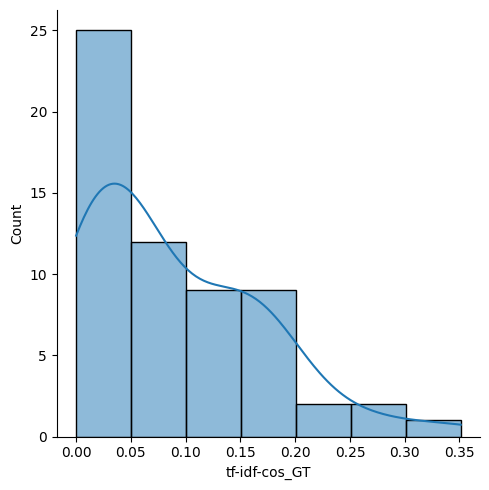

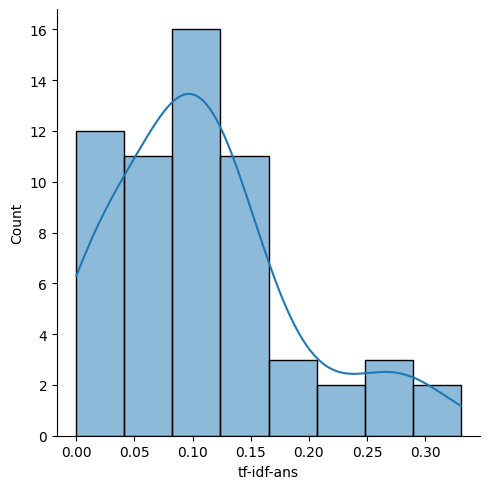

In [28]:
sns.displot(data=test_curated['tf-idf-cos_GT'], kde=True)
sns.displot(data=dummy_curated['tf-idf-ans'], kde=True)

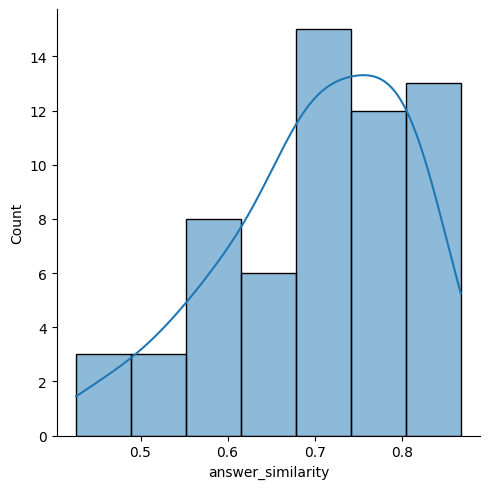

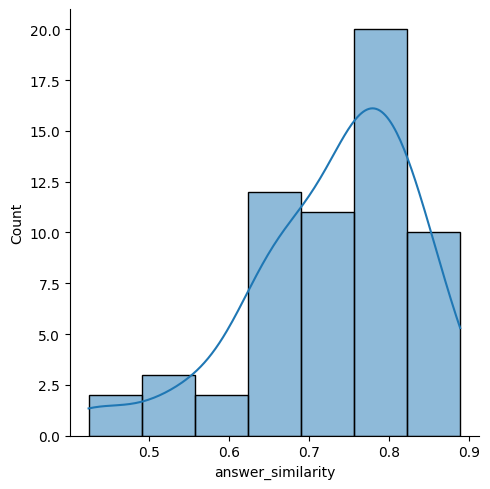

In [29]:
sns.displot(data=test_curated['answer_similarity'], kde=True)
sns.displot(data=dummy_curated['answer_similarity'], kde=True)

In [30]:
df1 = test_curated[test_curated['tf-idf-cos_GT']==0]
df1.name = 'low-tf-test'
df2 = dummy_curated[dummy_curated['tf-idf-ans']==0]
df2.name = 'low-tf-dummy'
df3 = test_curated[test_curated['answer_similarity']<0.5]
df3.name = 'low-sem-test'
df4 = dummy_curated[dummy_curated['answer_similarity']<0.5]
df4.name = 'low-sem-dummy'
df_list = [df1, df2, df3, df4]

for i in df_list:
    i.drop(
    i.columns.difference([
        'question',
        'contexts',
        'answer',
        'ground_truth',
        'tf-idf-cos_GT',
        'tf-idf-ans',
        'answer_similarity'
        ]),
    axis=1,
    inplace=True
    )
    i['select'] = [i.name for x in i.index]


bad_apples = pd.concat(df_list)
bad_apples

/tmp/ipykernel_48670/3649930463.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(
/tmp/ipykernel_48670/3649930463.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['select'] = [i.name for x in i.index]
/tmp/ipykernel_48670/3649930463.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(
/tmp/ipykernel_48670/3649930463.py:25: SettingWithCopyWarning: 
A value

,question,contexts,answer,ground_truth,answer_similarity,tf-idf-cos_GT,select,tf-idf-ans
1,Complete the following paragraph: Monosacchari...,"['Glycans favoring cell motility (e.g., polysi...","through various linkages, such as α-1,2-, β-1,...","For example, glucuronic acid (GlcA) can be epi...",0.563141,0.00000,low-tf-test,NaN
5,Complete the following paragraph: The biosynth...,"['Glycans favoring cell motility (e.g., polysi...",with over 100 distinct members identified to d...,"In many cases, they catalyze a group-transfer ...",0.679391,0.00000,low-tf-test,NaN
10,Complete the following paragraph: Nearly all g...,"['Glycans favoring cell motility (e.g., polysi...",These lipids play crucial roles in various cel...,Other GSLs were later identified because they ...,0.577965,0.00000,low-tf-test,NaN
16,Complete the following paragraph: Genetic evid...,"['For example, the name of the closed ring Neu...",This complexity highlights the need for a comp...,These enzymes are important control points bec...,0.706851,0.00000,low-tf-test,NaN
21,Complete the following paragraph: In compariso...,"['Glycans favoring cell motility (e.g., polysi...",The mechanisms by which these archaeal species...,N-glycosylation has been considered as assisti...,0.688688,0.00000,low-tf-test,NaN
22,Complete the following paragraph: A. fumigatus...,"['Glycans favoring cell motility (e.g., polysi...",Aspergillosis.,"As with other fungal pathogens, the surface gl...",0.452558,0.00000,low-tf-test,NaN
23,Complete the following paragraph: Apiogalactur...,"['Glycans favoring cell motility (e.g., polysi...",underscoring the potential for novel interacti...,It is composed of 12 different monosaccharides...,0.692721,0.00000,low-tf-test,NaN
31,Complete the following paragraph: A common fea...,"['Glycans favoring cell motility (e.g., polysi...",This monomeric structure allows the legume L-t...,The glycan-binding and metal-binding sites are...,0.537083,0.00000,low-tf-test,NaN
40,Complete the following paragraph: In animals w...,"['Glycans favoring cell motility (e.g., polysi...",The glycans present in this milk play a crucia...,Genetic modifications that eliminate initial s...,0.485331,0.00000,low-tf-test,NaN
44,Complete the following paragraph: Although the...,"['Glycans favoring cell motility (e.g., polysi...",but more than a decade went by before the next...,"In retrospect, the difficulty arose from the p...",0.757288,0.00000,low-tf-test,NaN


In [31]:
bad_apples.to_csv('./bad_apples.csv')